# Business Understanding

## Project Domain

Stroke adalah salah satu penyakit mematikan yang sering terjadi secara tiba-tiba dan dapat menyebabkan kecacatan permanen atau kematian. Upaya preventif menjadi sangat penting, terutama dengan memanfaatkan teknologi untuk mendeteksi risiko stroke berdasarkan faktor-faktor klinis dan gaya hidup. Proyek ini menggunakan model Artificial Neural Network (ANN) untuk memproses dan mengklasifikasikan data pasien apakah berisiko mengalami stroke atau tidak. Dataset yang digunakan adalah dataset publik dari Kaggle yang berisi fitur-fitur seperti usia, jenis kelamin, tekanan darah, kadar glukosa, status merokok, dan lainnya.

## Problem Statements



1.  Tingginya angka kematian dan kecacatan akibat stroke membutuhkan sistem deteksi dini yang efektif.
2. Proses identifikasi risiko stroke secara manual oleh tenaga medis memerlukan waktu dan sumber daya yang besar.
3. Diperlukan pendekatan otomatis berbasis data untuk membantu prediksi risiko stroke secara lebih cepat dan akurat


## Goals

1. Mengembangkan model prediksi risiko stroke menggunakan algoritma Artificial Neural Network (ANN).
2. Melakukan preprocessing data medis pasien agar siap digunakan dalam pelatihan model.
3. Melatih dan menguji performa model ANN pada dataset prediksi stroke dari Kaggle

## Solution Statements

1. Menggunakan Artificial Neural Network (ANN) untuk memodelkan hubungan non-linear antara fitur data medis dan risiko stroke.
2. Melakukan pra-pemrosesan data seperti normalisasi, encoding, dan penanganan data kosong untuk meningkatkan kualitas input model.
3. Menerapkan teknik train-test split untuk membagi data menjadi data pelatihan dan data pengujian guna mengevaluasi performa model.
4. Melatih model ANN menggunakan algoritma backpropagation dan optimisasi (misalnya Adam Optimizer) untuk mempercepat konvergensi.

# Data Understanding

## Import data dari kaggle

In [2]:
from google.colab import files
files.upload()
import shutil
import os
os.makedirs('/root/.kaggle', exist_ok=True)
shutil.move('kaggle.json', '/root/.kaggle/kaggle.json')
os.chmod('/root/.kaggle/kaggle.json', 600)

Saving kaggle.json to kaggle.json


In [3]:
!pip install kaggle

In [4]:
!kaggle datasets download -d fedesoriano/stroke-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
License(s): copyright-authors


In [5]:
!unzip stroke-prediction-dataset.zip

Archive:  stroke-prediction-dataset.zip
  inflating: healthcare-dataset-stroke-data.csv  


## Import Library yang dibutuhkan

In [6]:
# Data manipulation
import numpy as np
import pandas as pd
import tensorflow as tf

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Modeling (Keras)
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.random import set_seed


# Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

In [7]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [8]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [10]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Exploratory Data Analysis

In [11]:
df[df['gender'] == 'Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


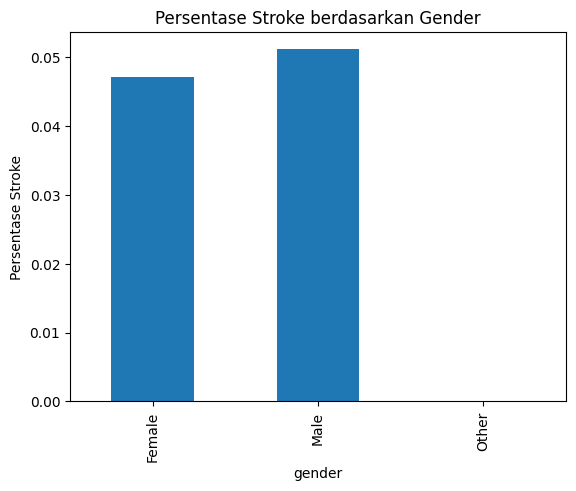

In [12]:
df.groupby('gender')['stroke'].mean().plot(kind='bar')
plt.title('Persentase Stroke berdasarkan Gender')
plt.ylabel('Persentase Stroke')
plt.show()

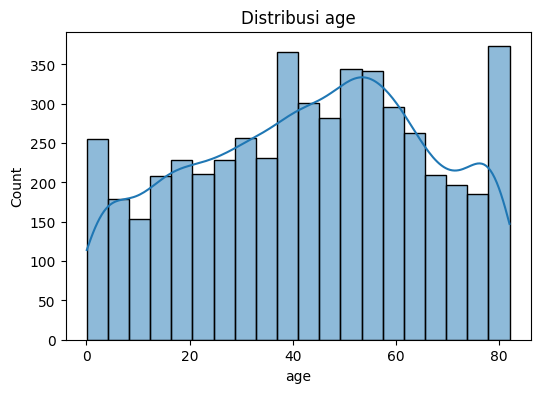

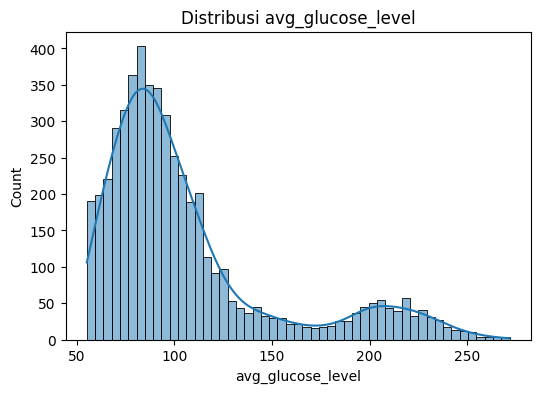

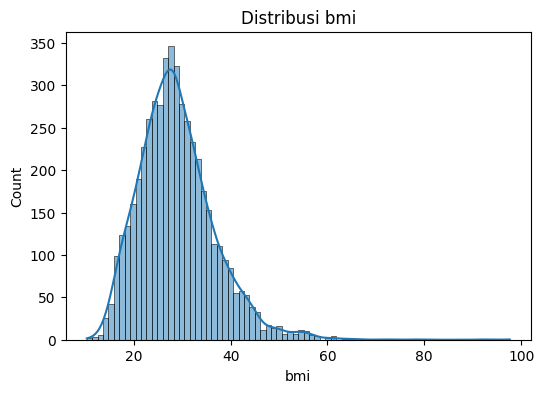

In [13]:
numerik = ['age', 'avg_glucose_level', 'bmi']

for col in numerik:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.show()

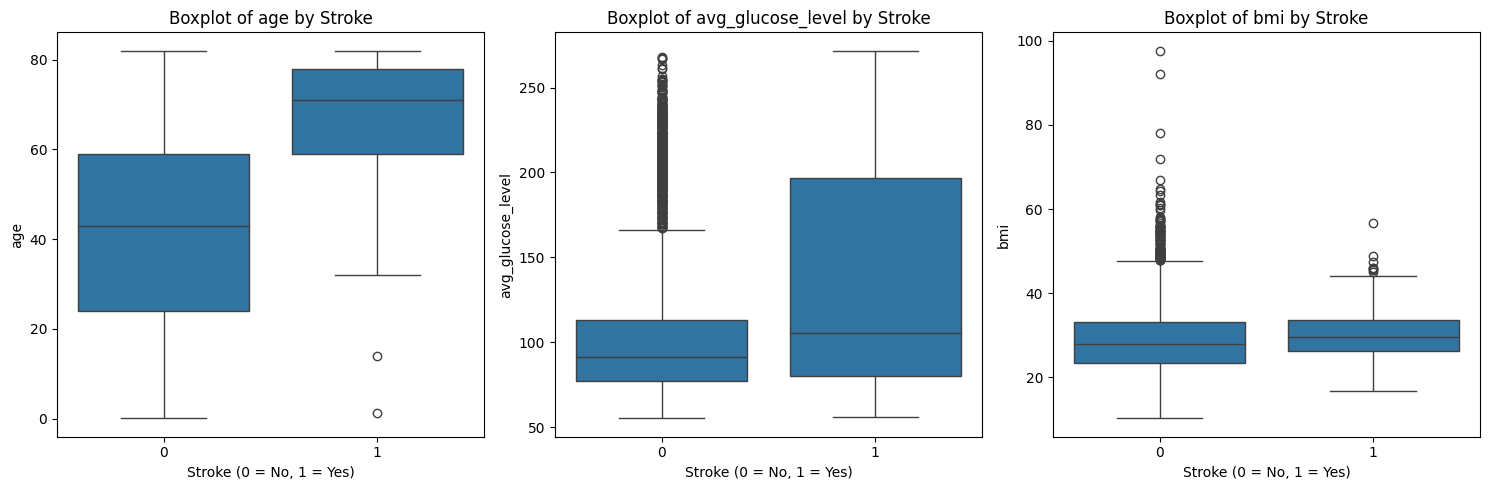

In [14]:
# Import library
import matplotlib.pyplot as plt
import seaborn as sns

# Asumsi df sudah berisi dataset kamu

# Membuat boxplot untuk kolom numerik terhadap label stroke
plt.figure(figsize=(15,5))

# Daftar kolom numerik yang mau dibuatkan boxplot
numerical_cols = ['age', 'avg_glucose_level', 'bmi']

# Loop untuk buat beberapa boxplot dalam satu baris
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='stroke', y=col, data=df)
    plt.title(f'Boxplot of {col} by Stroke')
    plt.xlabel('Stroke (0 = No, 1 = Yes)')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


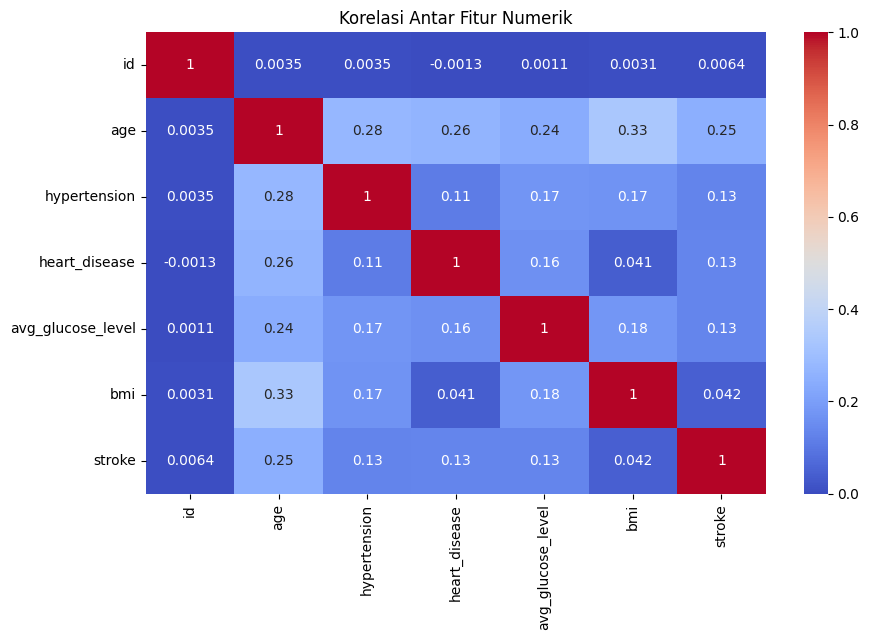

In [15]:
# Pilih hanya kolom numerik
df_num = df.select_dtypes(include=['int64', 'float64'])
# Heatmap korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi Antar Fitur Numerik")
plt.show()

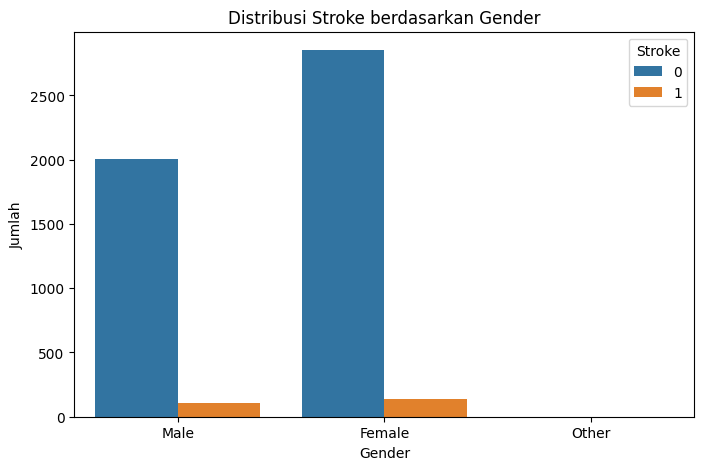

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='gender', hue='stroke')
plt.title('Distribusi Stroke berdasarkan Gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah')
plt.legend(title='Stroke')
plt.show()

# Data Preparation

In [17]:
# Mengisi missing value
# Kolom 'bmi' ada missing value, isi dengan 0
df['bmi'].fillna(0, inplace=True)
df.isnull().sum()

<ipython-input-17-4792dfe9efd6>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(0, inplace=True)


,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


In [18]:
print(df.columns)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [19]:
X = df.drop(columns='stroke')  # Fitur
y = df['stroke']               # Label

In [20]:
df = df.drop(columns=['id'], errors='ignore')

In [21]:
set_seed(42)
np.random.seed(42)

In [26]:
from sklearn.impute import SimpleImputer
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
df = pd.get_dummies(df, drop_first=True)

In [24]:
X = df.drop(columns='stroke')
y = df['stroke']

In [27]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # atau 'median', 'most_frequent' sesuai jenis datanya
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [28]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Modeling

In [29]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# 1. Terapkan SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 2. Cek hasil resampling
print("Sebelum SMOTE:\n", y_train.value_counts())
print("Setelah SMOTE:\n", pd.Series(y_train_resampled).value_counts())

# 3. Buat ulang dan latih model ANN
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],))) # hidden layer 1
model.add(Dense(16, activation='relu')) # hidden layer 2
model.add(Dense(1, activation='sigmoid')) # output layer untuk klasifikasi biner

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_resampled, y_train_resampled, epochs=100, batch_size=32, validation_split=0.2)

Sebelum SMOTE:
 stroke
0    3901
1     187
Name: count, dtype: int64
Setelah SMOTE:
 stroke
0    3901
1    3901
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5615 - loss: 1.7342 - val_accuracy: 0.2748 - val_loss: 1.2373
Epoch 2/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7277 - loss: 0.5330 - val_accuracy: 0.2806 - val_loss: 1.1386
Epoch 3/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7496 - loss: 0.5050 - val_accuracy: 0.3107 - val_loss: 1.0265
Epoch 4/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7587 - loss: 0.4878 - val_accuracy: 0.3370 - val_loss: 0.9900
Epoch 5/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7655 - loss: 0.4765 - val_accuracy: 0.3562 - val_loss: 0.9681
Epoch 6/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7690 - loss: 0.4681 - val_accuracy: 0.3594 - val_loss: 0.9598
Epoch 7/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7733 - loss: 0.4625 - val_accuracy: 0.3722 - val_loss: 0.9468
Epoch 8/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7745 - loss: 0.4592 - val_accu

In [30]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Akurasi Test Set:", accuracy)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8908 - loss: 0.2887
Akurasi Test Set: 0.89334636926651


# Evaluation

In [31]:
y_pred_proba = model.predict(X_test)  # predict probabilitas
y_pred_classes = (y_pred_proba > 0.3).astype(int)  # ubah threshold jadi 0.4

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [32]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))

Confusion Matrix:
[[808 152]
 [ 30  32]]


In [33]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_classes))


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.84      0.90       960
           1       0.17      0.52      0.26        62

    accuracy                           0.82      1022
   macro avg       0.57      0.68      0.58      1022
weighted avg       0.92      0.82      0.86      1022



## Model Simulation

In [34]:
import numpy as np

# Data input baru (isi disesuaikan dengan urutan fiturnya)
data_baru = np.array([[67,       # age
                       1,        # hypertension
                       0,        # heart_disease
                       210.5,    # avg_glucose_level
                       27.3,     # bmi
                       1, 0,     # gender_Male, gender_Other
                       1,        # ever_married_Yes
                       0, 1, 0, 0,  # work_type
                       1,        # Residence_type_Urban
                       0, 1, 0]])  # smoking_status

# Transformasi (jika pakai imputer dan/atau scaler)
data_baru = imputer.transform(data_baru)
# data_baru = scaler.transform(data_baru)  # kalau kamu pakai scaler

# Prediksi
prediksi = model.predict(data_baru)
prediksi_kelas = (prediksi > 0.5).astype("int32")

# Output hasil prediksi
hasil = "Ya Stroke" if prediksi_kelas[0][0] == 1 else "Tidak Stroke"
print("Hasil Prediksi:", hasil)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Hasil Prediksi: Tidak Stroke


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


## Save Model

In [35]:
# Simpan model ke file .h5
model.save("model_prediksi_stroke.h5")

In [36]:
# 1. Convert model ke TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

Saved artifact at '/tmp/tmp06icff8s'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 16), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  136869380255248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136869380258128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136869380255824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136869380253136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136869380258704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136869380259088: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [37]:
# 2. Simpan model TFLite ke file
with open('model_stroke_prediction.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model berhasil dikonversi ke TFLite dan disimpan!")

Model berhasil dikonversi ke TFLite dan disimpan!


# Deployment

In [38]:
import joblib
from sklearn.preprocessing import StandardScaler # Import StandardScaler

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Sesuaikan kode Anda untuk menggunakan scaler ini, misalnya:
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# Simpan scaler ke file
joblib.dump(scaler, 'scaler.pkl')
print("Scaler berhasil disimpan ke file scaler.pkl!")

Scaler berhasil disimpan ke file scaler.pkl!
